# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [110,200,439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11818,1648,1694,2276,169,1647
1,3067,13240,23127,3941,9959,731
2,2787,1698,2510,65,477,52


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**The first sample is likely to represent a restaurant. Because the first sample is having much larger amount of fresh products than that of other products, indicating that customers' business heavily relies on fresh products. While the amount of fresh falls near mean of the dataset, this means its consumption of fresh product is on an average level. So this customer is less likely to be a large scale fresh products wholesale business. Therefore, the most possible type of the customer would be a restaurant. 

Similarly, the second sample is likely to be a supermarket. Because amount of three catrgories, milk, grocery, and detergents_paper, of this customer are at least one std away from the mean of the data set. This shows the customer's daily consumption of those products is very high, which corresponds to the character of a supermarket.

The third sample, all products are in a small amount, comparing to the mean of the dataset. While fresh and grocery are having relatively larger amount, showing that this customer is very likely to be a grocery retailer.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for target_feature in data.keys():
    new_target=data[target_feature]
    new_data = data.drop(target_feature,axis=1)

    from sklearn import cross_validation
# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data, new_target, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.grid_search import GridSearchCV
    regressor = DecisionTreeRegressor(random_state=0)
    parameters={'max_depth':[4,5,6,7,8,9]}
    reg=GridSearchCV(regressor,parameters)
    reg.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
    score = reg.score(X_test,y_test)
    print("score of the model using feature '{}' is {}".format(target_feature,score))

score of the model using feature 'Fresh' is 0.164815885285
score of the model using feature 'Milk' is 0.36776762716
score of the model using feature 'Grocery' is 0.709643205225
score of the model using feature 'Frozen' is 0.0668878435478
score of the model using feature 'Detergents_Paper' is 0.595599575758
score of the model using feature 'Delicatessen' is -12.4463267367


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**I would first guess the feature 'Detergents_Paper' may be highly related to other features. I would expect that a bar, cafe, take-out or restaurant will have high value of 'Detergents_Paper'. To some extent, those kinds of customers can be characterized by specific patterns of values in 'Fresh', 'Milk', 'Grocery', and 'Delicatessen'.

According to the reported prediction score, using 'Detergents_Paper' as the target variable, DecisionTreeRegression model has an R^2 score approximately 0.5956, this is a relatively high score comparing to that of other features, 'Fresh' 0.1648, 'Milk' 0.3678, 'Grocery' 0.7096, 'Frozen' 0.0669, 'Delicatessen' -12.4463. This confirms my intuition with 'Detergents_Paper'. However, I would not conclude anything on this feature. Because, it's safe to say 'Fresh', 'Frozen', and 'Delicatessen' should be necessary for identifying cstomers' spending habits because they are almost unrelated to other features. While if we do need to discard a feature in order to reduce the feature dimension. 'Grocery' seems to be a better choice than 'Detergens_Paper' because of the higher R^2 score of the model taking to the feature 'Grocery' as the target variable.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

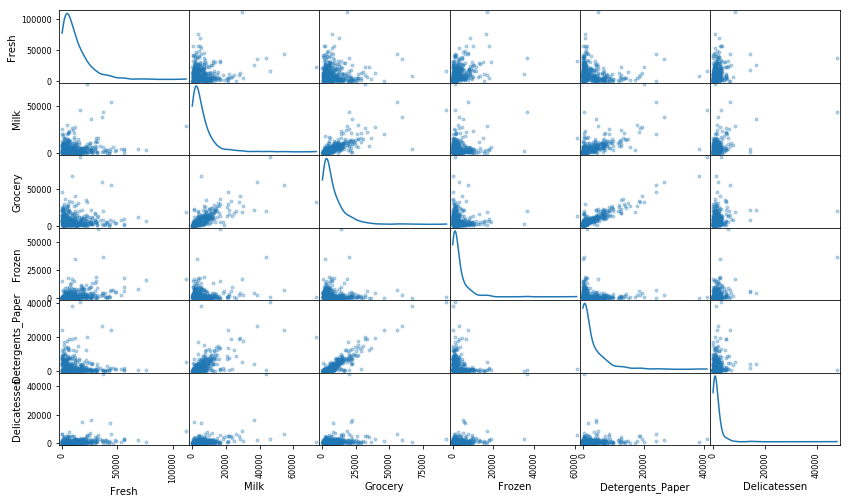

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** From the figure, we see that there are no obvious correlation between any of 'Fresh', 'Frozen', 'Delicatessen' and other features. While there is an approximate linear relation between 'Grocery' and 'Detergent_Paper', and there exsits weak linear relation between 'Milk', 'Grocery' and 'Detegent_Paper'. These confirm my conclusions in Question 2.

All features seem to have truncated normal distributions with drifts. Most points of the data lie within the bands with width of 2*std and center line of mean, which agrees with the property of normal distribution. However, strictly speaking, the data points are not following normal distributions.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

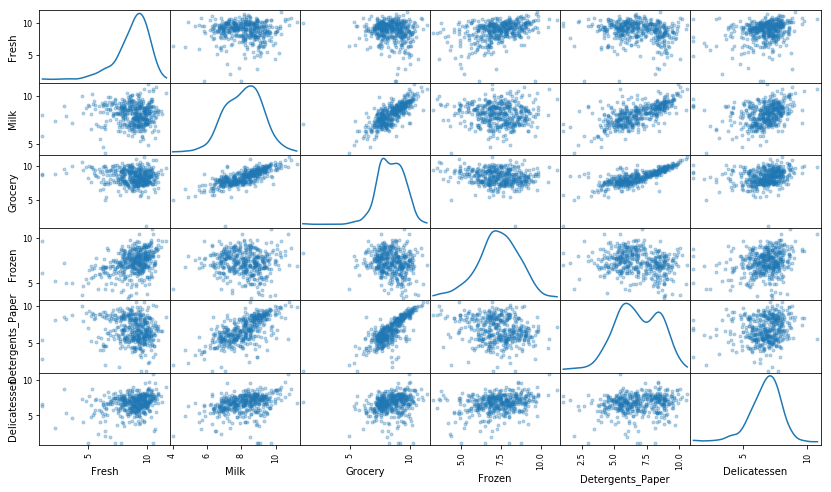

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(data.loc[indices])

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
110,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711
200,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
# For each feature find the data points with extreme high or low values
outlier_candidates={}

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    
    for index in list(log_data[~((log_data[feature] >= Q1 - step) & \
                                                (log_data[feature] <= Q3 + step))].index):
        if index in outlier_candidates:
            outlier_candidates[index]+=1
        else:
            outlier_candidates[index]=1
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
for key, val in outlier_candidates.iteritems():
    if val>=2:
        outliers.append(key)

print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64')

Data points considered outliers for the feature 'Milk':


Int64Index([86, 98, 154, 356], dtype='int64')

Data points considered outliers for the feature 'Grocery':


Int64Index([75, 154], dtype='int64')

Data points considered outliers for the feature 'Frozen':


Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64')

Data points considered outliers for the feature 'Detergents_Paper':


Int64Index([75, 161], dtype='int64')

Data points considered outliers for the feature 'Delicatessen':


Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64')

[128, 154, 65, 66, 75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**There are five samples, with indeces 128,154,65,66, and 75, having more than one features as outliers, we denoted them as 'multi-outliers'.

Multi-outliers shoule be discarded because they are more likely to have significant effect on a model, than those outliers in just one feature, especially when those multiple features with outliers are not closely correlated. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

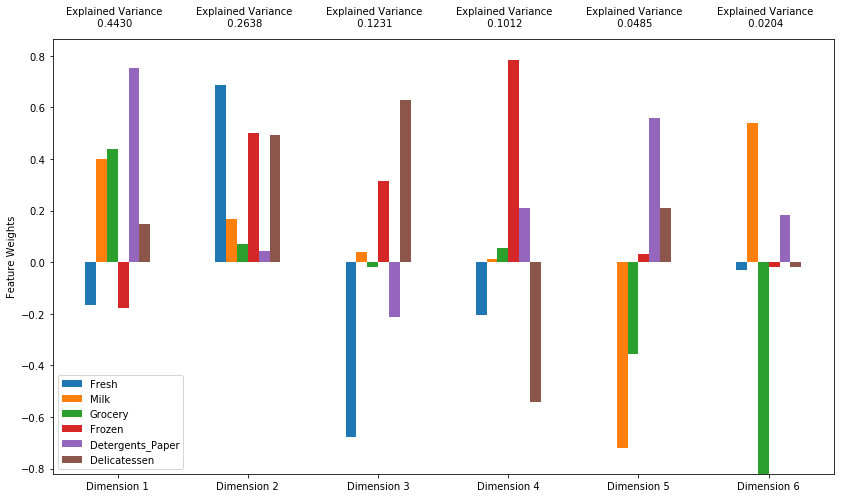

In [9]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [10]:
print("Ratio of variance explained with first 2 PCs: {}".format(sum(pca.explained_variance_ratio_[:2])))
print("Ratio of variance explained with first 4 PCs: {}".format(sum(pca.explained_variance_ratio_[:4])))

Ratio of variance explained with first 2 PCs: 0.706817230807
Ratio of variance explained with first 4 PCs: 0.931090109951


**Answer:** The first two PCs explain 70.68% of the data's variance and the first four PCs explain 93.11%.

Based on the plot above, the first principal component mainly represents the customer's consumption of 'Milk', 'Grocery', and 'Detergents_Paper'. They are all positively correlated to Dimension 1, meaning large value of anyone within these features will lead to large value of Dimension 1. 'Detergents_Paper' is the feature having the most influence on Dimension 1. From previous intuition of those three samples, I expect a market-like customer to have a high value of Dimension 1.

The second principal component reprensets the customer's consumtion of 'Fresh', 'Frozen', and 'Delicatessen'. They all have positive correlation with Dimension 2. The feature 'Fresh' has the most influence. A customer with have value of Dimension 2 is very likely to have its main business on food service or food retail. But it's hard to tell whether the customer is hotel-like or market-like based on the value of Dimension 2.

The third pricipal component represents the features of 'Fresh' and 'Delicatessen'. While 'Fresh' is positively correlated to Dimension 3. 'Delicatessen' is negatively correlated to Dimension 3. So if a sample has a high positive value in Dimension 3, it must have a smaller value of 'Fresh' than that of 'Delicatessen'. If the value in Dimension 3 is a negative value, then the costumer cosumes more 'Fresh' than 'Delicatessen'. While if the value in Dimension 3 is close to 0, this means the costumer's consumptions of 'Fresh' and 'Delicatessen' are close to each other. Both 'Fresh' and 'Delicatessen' are having significantly influences on Dimension 3. Dimension 3 indicates the type of food a customer provides to its clients, a positive value of Dimension 3 indicates the customer relis more on fresh food service. While a negative value is likely to see the customer provides more prepared food than fresh food.

The fourth pricipal represents 'Frozen' and 'Delicatessen'. 'Frozen' is positively correlated to Dimension 4 while 'Delicatessen' is negatively corelated to Dimension 4. They both have significant influences on Dimensin 4. Following a similar reason with that of Dimension 3, positive value of Dimension 3 shows that the customer relies on frozen food more than delicatessen, and vice versa.

A combination of Dimension 3 and Dimension 4 may be used to predict the type of a sample. For example, if a sample has its Dimension 3 and Dimension 4 both positive, meaning it relis on unprepared food more than prepared food. Then the sample is likely to be a restaurant-like business. While if both Dimensions have negative values, this means the sample relies on prepared food very much.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.0607,0.7100,0.5062,-0.6087,0.1154,0.1072
1,2.9903,0.3645,0.2521,1.5653,-0.1922,-0.1244
2,-0.7390,-3.6914,-2.0335,-0.9927,-0.3109,0.1734


**Observation:** I'd like to say the tranformed samples are consistent with my initial guesses of those samples. As far as I can see, the new feature 'Dimension 1' kind of represents how likely a customer is related to consumption of 'Milk', 'Grocery' and 'Detergents_Paper'. 'Dimension 2' represents the a customer's relation with consumption of all kinds of food. 'Dimension 3' relates to whether 'Fresh' or 'Delicatessen' takes a majority in a customer's food consumption. 'Dimension 4' relates to the importance of 'Frozen' in a customer's food consumption. Then from the above analysis and the transformed sample data, we have following conclusions:

The first sample is very likely to be a hotel-like business and consumes large amount of 'Fresh' or 'Delicatessen' food.

The second sample is highly possible to be a food market, consumes many food, especially for 'Milk' and 'Grocery'.

'Dimension 1' does not provide obvious hint for business type of the first sample. While 'Dimension 2' shows that this sample consumes a very small amount of food and 'Dimension 3' shows that it mainly consumes 'Fresh' food. So sample 3 is very likely to be a fresh food retailer.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
print(log_samples)
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

        Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
110  9.377379  7.407318   7.434848  7.730175          5.129899      7.406711
200  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
439  7.932721  7.437206   7.828038  4.174387          6.167516      3.951244


,Dimension 1,Dimension 2
0,-2.0607,0.7100
1,2.9903,0.3645
2,-0.7390,-3.6914


**Observation:** I would expect chaging number of components in PCA will not affect how PCA transforms the dataset, as long as number of components is larger than the number of first few PCs we are interested in.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

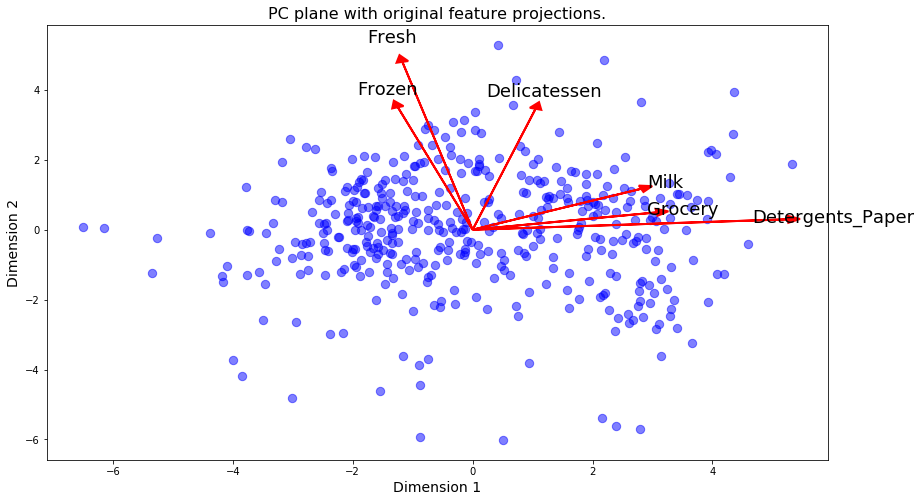

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Observation:** For 'Dimension 1', 'Detergents_Paper' is most strongly correlated to it, because the angle between the 'Detergents_Paper' vector and the axis of 'Dimension 1' is the smallest one and the projection of the 'Detergents_Paper' vector onto the axis of 'Dimension 1' is the longest one as well.

Based on the same reason, 'Fresh', 'Frozen' and 'Delicatessen' are more correlated to 'Dimension 2', and they are having approximately the same amount of influences to 'Dimension 2'.

Compared to the plot of pca_results, in 'Dimension 1' the bar of 'Detergents_Paper' is the longest one. In 'Dimension 2', 'Fresh', 'Frozen, and 'Delicatessen' are with bars of approximately the same length. So our observtions are consistent with the pca_result.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means clustering is easy to implement and to train. It minimizes the sum of sqaured distantce to centroid within each cluster. It runs fast for finding clusters. K-Means can be applied to a dataset with small number of samples. There are some drawbacks with K-Means Clustering. It may stop at a local minimum and therefore needs to be run several times using different random initial selection of centroids.  It assumes spherical boundaries for clusters. A sophsticated and complicate norm function is needed for complex geometry of data points. Its solution is unstable.

Gaussian Mixture Model aims to maximize the likelihood. It's fast to train the model. It does not bias the mean of clusters to be zero and does not bais the shape of clusters to be spherical of other specific shapes. However, GMM is assuming dataset is distributed in normal distributions. GMM also needs sufficient number of samples to do an effective estimation.

Since transformed dataset does not have obvious partitions and is clustered approximately in a spherical shape. I would expect K_Means clustering method would suffer unstability. It may also be difficult to decide the number of clusters for training the K-Means model.

Our log_data is mostly following normal distributions which is consistent with the assumption of GMM. So I will choose GMM as my candidate. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
n_comp_cand=[3,4,5,8,11,14,20,26,35,2]
for cand in n_comp_cand:
    clusterer = GMM(n_components=cand,random_state=0)
    clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

    score = silhouette_score(reduced_data,preds)
    print("Silhouette score for {} components: {}".format(cand,score))

Silhouette score for 3 components: 0.373560747175
Silhouette score for 4 components: 0.308243479507
Silhouette score for 5 components: 0.295441470747
Silhouette score for 8 components: 0.3120673235
Silhouette score for 11 components: 0.297080033441
Silhouette score for 14 components: 0.252340902267
Silhouette score for 20 components: 0.192584527537
Silhouette score for 26 components: 0.118695330445
Silhouette score for 35 components: 0.123258232807
Silhouette score for 2 components: 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** Scores are shown below:

| Number of components |   2   |   3   |   4   |   5   |   8   |   11   |   14   |   20   |   26   |   35   |
| :------------------: | :---: | :---: | :---: | :---: | :---: | :----: | :----: | :----: | :----: | :----: |
| Silhouette Score     | 0.4118| 0.3736| 0.3082| 0.2954| 0.3121| 0.2971 | 0.2523 | 0.1926 | 0.1187 |  0.1233|
Using two clusters gives the best silhouette score of 0.4118.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

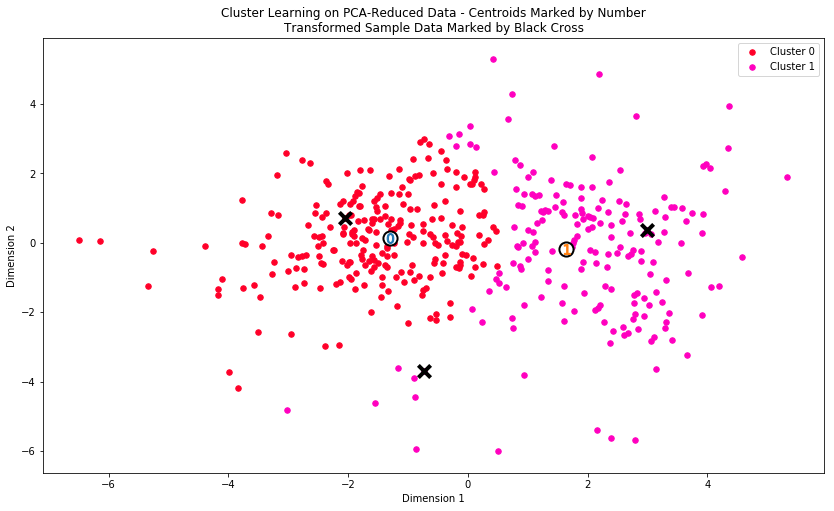

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**Customer segments 0 is characterized by relatively higher value of 'Fresh' and 'Frozen'. So customers assigned to this cluster is likely to be a hotel.

Customer segments 1 is characterized by relatively higher value of 'Milk', 'Grocery' and 'Detergents_Paper', showing that customers falling in this cluster are more likely to be a food market.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**According the predictions, the first sample is a hotel and the second sample is a food market. These are consistent with our intuition of those samples. The third sample is supposed to be a fresh food retailer. It falls into segment 1 which relates more to a market type business as well. While since its values in six features are all very small, making it far away from those clusted data points, it is hard to tell whether the prediction is right or not.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Since different types of goods depends on the efficiency of delivery method very differently. Meanwhile, customers in the two segments are having different dependencies of those features. So I would expect a faster delivery method is likely to gain different feedbacks from customers in the two segments. 

Therefore, we may perform an A/B test to two customer segments separately. For each segment, the distributor should split the test samples into two groups A and B with the same volume. Samples should be assigned to group A and B randomly to prevent experiment bais. Then the distributor should provide the 5 days a week service (plan 1) to group A and 3 days a week service (plan 2) to group B. Based on the customers' positive feedbacks to plan 1 and plan 2 from group A and group B, the distributor can justify whether this customer segment prefers a plan of delivery service. For example, if in the test for segment 0, the positive respond rate of plan 1 in Group A is significantly higher than that of plan 2 in Group B. Then it can be concluded that customers in segments 0 is more likely to react positively to plan 1. Conclusion for segment 1 can be drawn in a similar way.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We can handle this by setting up a classification model taking label of customer segments as the target variable. The distributor can either take those six features as the inputs of the model, or follow that same transformation we did in the previous sections, and take transformed, or reduced features as the inputs. Using the original dataset to train the classification model. Then the distributor can use the model to predict what segment the new customers fall into.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

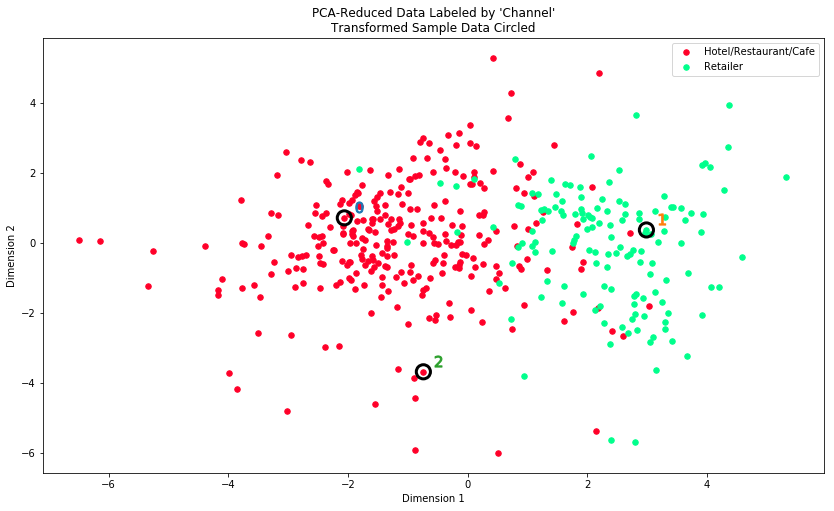

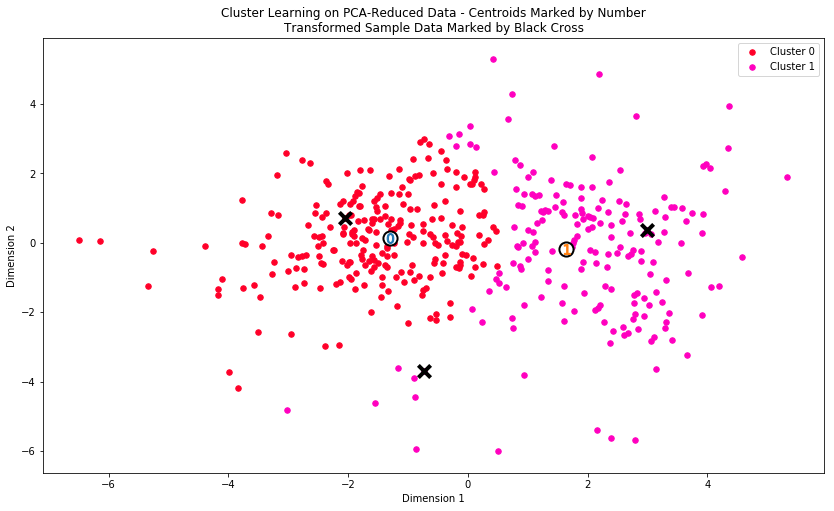

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**The clustering algorithm correctly detects that there are two classifications of the data with respect to 'Channel'. The algorithm also classifies most of the dataset correctly into its corresponding cluster.

We see most samples classified as segment 0, which we expect to be hotel-like businesses, are shown to be from the 'Channel' hotel/restaurant/cafe. On the other hand, most samples from segment 1 is in 'Channel' retailer. So I would say segment 0 predicts a sample as a hotel/restaurant/cafe, segment 1 predicts a sample as a retailer. These are consistent with out previous intuition.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.